# TRABALHANDO COM ARQUIVOS(ENTRADA E SAIDA)

## ARQUIVOS CSV 

A melhor forma de trabalhar com arquivos é salva-los no formato "`CSV`". ***Comma-separated values*** (ou `CSV`) é um formato de arquivo que armazena dados tabelados, cujo grande uso data da época dos mainframes. Por serem bastante simples, arquivos CSV são comuns em todas as plataformas de computador. 
    
O `CSV` é um implementação particular de arquivos de texto separados por um delimitador, que usa a vírgula e a quebra de linha para separar os valores. O formato também usa as aspas em campos no qual são usados os caracteres reservados (vírgula e quebra de linha). Essa robustez no formato torna o `CSV` mais amplo que outros formatos digitais do mesmo segmento. Fonte: wikipedia. 

Forma geral de um arquivo `CSV` na forma de texto:
```julia
   nome_coluna_1, nome_coluna_2
   dado_col_1   , dado_col_2
   dado_col_1   , dado_col_2
```
Uma forma prática de criar arquivos `CSV` é usando uma planilha (excel, calc-libreoffice/openoffice) eletrônicab. Basta preencher os dados nas celulas e depois salvar como CSV.

In [100]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Updating SymPy master...
INFO: Updating NumericalMath master...
INFO: Computing changes...
INFO: No packages to install, update or remove


### MANIPULAÇÃO DE ARQUIVOS CSV

#### Criação de um arquivo CSV pelo editor de texto do JuPyter

Na pagina principal do JuPyter, selecione `New -> Text File` conforme figura abaixo:
![](novo_arq_txt.png)

Digite os dados conforme figura abaixo:
![](arquivo_csv.png)

Julia salva o arquivo no formato `TXT` então basta clicar no  título e alterar o nome para `teste.csv`. Para importar os dados use a sintaxe:
```julia
var_dados = readcsv("nome_arquivo.csv")
```
O comando `readcsv` ja faz a conversão para tipo Float64 e coloca os dados em uma estrutura do tipo `Array`. Caso o arquivo CSV tenha um cabeçalho que defina as colunas, ocorrerá erro quando for manipulá-lo, pois o cabeçalho é do tipo String e portanto deve ser removido. utilize:
```julia
var_dados = readcsv("nome_arquivo.csv")[2:end,:]
```
Dessa forma a primeira linha do arquivo contendo o cabeçalho será ignorada.

In [49]:
tabela_dados = readcsv("teste.csv")

7×2 Array{Float64,2}:
 0.0  0.0
 1.0  1.5
 2.0  1.7
 3.0  1.8
 4.0  1.0
 5.0  1.6
 6.0  1.8

#### Manipulação dos dados arquivo

In [8]:
# lstar o elemento da terceira linha e segunda coluna
tabela_dados[3,2]

1.7

In [9]:
# multiplicar todos os elementos da segunda linha por 100
tabela_dados[:,2]*100

7-element Array{Float64,1}:
   0.0
 150.0
 170.0
 180.0
 100.0
 160.0
 180.0


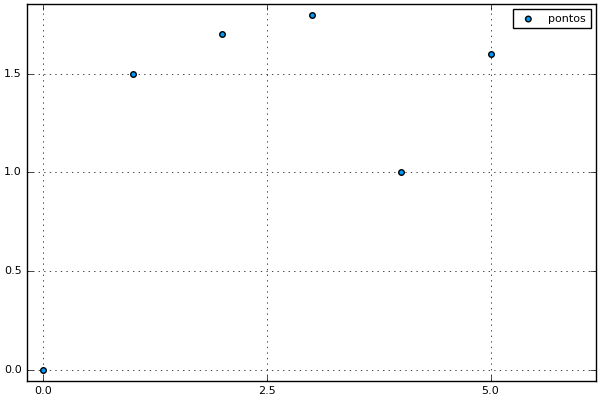

In [11]:
# gráfico dos dados
using Plots
pyplot()

scatter(tabela_dados[:,1], tabela_dados[:,2], label = "pontos")

#### Criação de uma arquivo CSV partir de uma matriz ou vetor

In [52]:
# criar uma matriz aleatória do tipo float
matriz_dados_1 = rand(1.0:100.0,5,5) # matriz de números tipo float entre 1 e 100
matriz_dados_2 = rand(5,5);          # matriz de números tipo float entre 0 e 1

5×5 Array{Float64,2}:
 0.00302067  0.944217  0.134834    0.381156  0.233619 
 0.300999    0.621022  0.00759359  0.340564  0.0998416
 0.614802    0.555501  0.410963    0.873535  0.932955 
 0.720499    0.688389  0.109061    0.027794  0.718095 
 0.526771    0.538022  0.764741    0.975424  0.853588 

In [53]:
# escrever em arquivo
writecsv("matriz_dados_1.csv", matriz_dados_1)
writecsv("matriz_dados_2.csv", matriz_dados_2)

In [54]:
# ler os dados gravados em arquivo
readcsv("matriz_dados_1.csv")

5×5 Array{Float64,2}:
 93.0  55.0   7.0  37.0  21.0
  7.0  38.0  39.0  83.0  36.0
 66.0  69.0  14.0  39.0  86.0
 86.0  28.0  71.0  53.0  46.0
  3.0  20.0   2.0  41.0  35.0

#### Concatenação e Arquivos CSV

É importante que as dimensões sejam compatíveis, ou seja, se for concatenação horizontal o numero de linhas deve ser igual, se for concatenação vertical então será o número de colunas. Sintaxe:

Horizontal (número de linhas iguais):

```julia
writecsv("novo_arquivo.csv", [readcsv("nome_arquivo1.csv")  readcsv("nome_arquivo2.csv")])
ou
writecsv("novo_arquivo.csv", hcat(readcsv("matriz_dados_1.csv") , readcsv("matriz_dados_2.csv")))
```
Vertical (número de colunas iguais):
```julia
writecsv("novo_arquivo.csv", [readcsv("nome_arquivo1.csv") ; readcsv("nome_arquivo2.csv")])
ou:
writecsv("novo_arquivo.csv", vcat(readcsv("matriz_dados_1.csv") , readcsv("matriz_dados_2.csv")))
```

In [12]:
# concatenação Horizontal
writecsv("matriz_dados_conc_hor.csv", [readcsv("matriz_dados_1.csv")  readcsv("matriz_dados_2.csv")])

In [13]:
readcsv("matriz_dados_conc_hor.csv")

5×10 Array{Float64,2}:
 45.0  19.0  72.0  28.0  70.0  0.881763  …  0.22633   0.68136   0.885492 
 71.0  34.0  21.0  32.0  34.0  0.119631     0.592543  0.192117  0.0685579
 10.0  65.0  72.0  93.0  59.0  0.832942     0.552115  0.688645  0.968075 
 69.0  74.0  85.0  93.0  63.0  0.987757     0.307122  0.824434  0.220857 
 93.0  24.0  53.0   8.0  54.0  0.135778     0.042761  0.147486  0.172255 

In [14]:
# concatenação vertical
writecsv("matriz_dados_conc_vert.csv", [readcsv("matriz_dados_1.csv"); readcsv("matriz_dados_2.csv")])

In [12]:
# ler resultado
readcsv("matriz_dados_conc_vert.csv")

10×5 Array{Float64,2}:
 45.0       19.0        72.0       28.0       70.0      
 71.0       34.0        21.0       32.0       34.0      
 10.0       65.0        72.0       93.0       59.0      
 69.0       74.0        85.0       93.0       63.0      
 93.0       24.0        53.0        8.0       54.0      
  0.881763   0.702503    0.22633    0.68136    0.885492 
  0.119631   0.906477    0.592543   0.192117   0.0685579
  0.832942   0.0232129   0.552115   0.688645   0.968075 
  0.987757   0.308866    0.307122   0.824434   0.220857 
  0.135778   0.539265    0.042761   0.147486   0.172255 

## ARQUIVOS DE DADOS JLD

Arquivo JDL é um formato amplamente utilizado para armazenamento de dados com a linguagem de programação Julia. JLD é um formato derivado do HDF5 aplicado para o armazenamento de dados científicos de grande volume. 

Arquivos HDF5 são organizados em uma estrutura hierárquica. Esta, pode ser vista como uma árvore de diretórios dentro de um arquivo. Suas duas estruturas primárias são groups e datasets (HDF Group, 2007). Um HDF5 group é uma estrutura de agrupamento que pode conter zero ou mais instâncias de grupos ou datasets, juntamente com seus metadados, enquanto um HDF5 dataset é um array multidimensional de dados também em conjunto com seus metadados.A figura abaixo representa a estrutura de um arquivo HDF5 [(PERANTUNES,2007)](https://projetos.inf.ufsc.br/arquivos_projetos/projeto_733/hilton_perantunes_ine5631.pdf). 
![Estrutura do HDF5](hdf5.png)
Um grupo contém zero ou mais HDF5 objects (grupos ou datasets), e é composto por duas partes: a primeira é formada por um cabeçalho contendo o nome do grupo e uma lista de atributos, sendo que a segunda parte é uma tabela de símbolos com uma listagem dos objetos HDF5 que pertencem ao grupo . Já um dataset possui um cabeçalho e um array de dados  [(PERANTUNES,2007)](https://projetos.inf.ufsc.br/arquivos_projetos/projeto_733/hilton_perantunes_ine5631.pdf).

Em comparação com HDF5, arquivos JLD adicionam automaticamente atributos e convenções de nomenclatura para preservar as informações de tipo para cada objeto. Vale resaltar que arquivos * .jld são arquivos HDF5 com recursos extras e, consequentemente, pode ser lido por qualquer linguagem que suporte HDF5. Para mais detalhes consulte [JuliaIO/JLD](https://github.com/JuliaIO/JLD.jl/) . Uma grande vantagem é que a saída do arquivo é do tipo dicionário e portante vale todas as operações para este tipo no notebook "TIPOS DE DADOS". Para instalar o pacote JLD use:
```julia
Pkg.add("JLD")
```

**Criar,  Abrir e gravar dados no arquivo JLD**

Para criar um novo arquivo basta abrir ou escrever um arquivo que não existe ainda e `Julia` irá escrever no disco o arquivo. Para escrever em um arquivo novo use:
```julia
save("nome_arquivo.jld", "key_1", valor_dado, "key_2", valor_dado,...)
```

In [13]:
using JLD

#### MODO BÁSICO

Neste primeiro contato, faremos apenas uma introdução rápida sobre a manipulação dos arquivos no formato `JLD` de tal forma que seja suficiente para o usuário gravar informações no disco e recuperá-las para trabalhar com os dados. A desvantagem é que alterado os dados de uma `key` é necessário salva todos os dados novamente no arquivo em disco.

In [14]:
matriz = rand(Float64,6,6)
vetor = rand(5)
nome = "Arquivos"

"Arquivos"

In [15]:
# salvar arquivo em disco 
save("arquivo_basico.jld", "matriz", matriz, "vetor", vetor , "nome", nome)

In [16]:
# ler os dados do arquivo gravado em disco
arquivo_basico = load("arquivo_basico.jld")

Dict{String,Any} with 3 entries:
  "matriz" => [0.692468 0.210977 … 0.219657 0.321783; 0.306363 0.895627 … 0.396…
  "vetor"  => [0.99109,0.174549,0.550174,0.12425,0.889987]
  "nome"   => "Arquivos"

In [17]:
# listar as keys
keys(arquivo_basico)

Base.KeyIterator for a Dict{String,Any} with 3 entries. Keys:
  "matriz"
  "vetor"
  "nome"

In [18]:
# listar os valores das keys
values(arquivo_basico)

Base.ValueIterator for a Dict{String,Any} with 3 entries. Values:
  [0.692468 0.210977 … 0.219657 0.321783; 0.306363 0.895627 … 0.396325 0.598717…
  [0.99109,0.174549,0.550174,0.12425,0.889987]
  "Arquivos"

In [19]:
# mostrar os valores da key "matriz"
arquivo_basico["matriz"]

6×6 Array{Float64,2}:
 0.692468  0.210977  0.935333  0.786403  0.219657  0.321783
 0.306363  0.895627  0.5676    0.22432   0.396325  0.598717
 0.142214  0.572731  0.342615  0.999145  0.601528  0.836343
 0.579529  0.578883  0.6333    0.982885  0.52108   0.1332  
 0.407764  0.813408  0.572201  0.318109  0.739952  0.302453
 0.863492  0.62513   0.332352  0.44772   0.211626  0.967624

In [318]:
# altera matriz 
arquivo_basico["matriz"] = rand(3,2)

3×2 Array{Float64,2}:
 0.199811   0.931183
 0.862908   0.197599
 0.0319696  0.548757

In [20]:
# salvar alterações em disco
save("arquivo_basico.jld", arquivo_basico)

In [21]:
# ler os dados do arquivo gravado em disco. Veja que a matriz mudou.
load("arquivo_basico.jld")

Dict{String,Any} with 3 entries:
  "matriz" => [0.692468 0.210977 … 0.219657 0.321783; 0.306363 0.895627 … 0.396…
  "vetor"  => [0.99109,0.174549,0.550174,0.12425,0.889987]
  "nome"   => "Arquivos"

#### MODO AVANÇADO

Nesta parte será trabalhado a abertura do arquivo para manipular os dados e fechamendo após as operações. Isto é importante pois permite salvar apenas as `keys` alteradas.

Um novo arquivo será criado quando executado o comando `jldopen` com atributo de gravação **"w"** e vinculado a uma variável. Sintaxe:
```julia
var_dados = jldopen("nome_arquivo.jld", atributo)

```
`Tabela de atributos`

<table border="1" class="docutils" style="float: left;">
<colgroup>
<col width="11%" />
<col width="89%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td>"r"</td>
<td>Somente ler os dados</td>
</tr>
<tr class="row-even"><td>"r+"</td>
<td>Ler e escrever mantendo os dados já escritos</td>
</tr>
<tr class="row-odd"><td>"w"</td>
<td>Escrever destruindo todos os dados existentes. CUIDADO! RECOMENDÁVEL SOMENTE PARA ARQUIVOS NOVOS</td>
</tr>

</tbody>
</table>

In [83]:
using JLD

In [115]:
arquivo_avancado = jldopen("arquivo_avancado.jld", "w")

Julia data file version 0.1.1: arquivo_avancado.jld

Uma vez aberto o arquivo não é possível abri-lo novamente ou com outro atributo, se fizer ocorrerá este erro:

        HDF5-DIAG: Error detected in HDF5 (1.8.16) thread 139655273372672:
          #000: ../../../src/H5F.c line 522 in H5Fcreate(): unable to create file
            major: File accessibilty
            minor: Unable to open file
          #001: ../../../src/H5Fint.c line 1024 in H5F_open(): unable to truncate a file which is already open
            major: File accessibilty
            minor: Unable to open file
            
Este erro informa que o arquivo está inacessível e que ja está aberto. Para alterar o atributo e abrir o arquivo novamente é necessário fecha-lo primeiro. Muitas vezes não sabemos qual objeto está vinculado ao arquivo aberto, dessa forma utilize a função `whos()` basta procurar pelo objeto do tipo `JLD.JldFile` e fecha-lo.

In [116]:
matriz = rand(Float64,6,6) # matriz aleatoria do tipo float64
vetor  = rand(5)           # vetor aleatóro do tipo float64
nome   = "Arquivos"        # string 
funcao = "x*sind(x)"       # função do tipo string

"x*sind(x)"

In [117]:
# gravando dados no arquivo
write(arquivo_avancado, "1", matriz)
write(arquivo_avancado, "2" , vetor)
write(arquivo_avancado, "3" , nome)
write(arquivo_avancado, "4" , funcao)

In [118]:
# fechando o arquivo
close(arquivo_avancado)

** Lendo arquivo de dados**

Para exibir os dados de uma `key` use:
```julia
read(nome_var_arquivo["nome_key"])
```
Sendo "nome_var_arquivo" o nome da variável que é atribído o arquivo gravado em disco e "nome_key" o nome da chave.

Para acessar valores específicos da `key` use:
```julia
read(nome_var_arquivo["nome_key"])[ordem_dado]
```
`ordem_dado` é a referência ao registro do dado num vetor, matriz e outros tipos básicos

In [119]:
using JLD

In [129]:
# vinculando a "arquivo_avancado" ao arquivo gravado em disco
arquivo_avancado = jldopen("arquivo_avancado.jld", "r+")

Julia data file version 0.1.1: arquivo_avancado.jld

In [130]:
typeof(arquivo_avancado)

JLD.JldFile

In [131]:
# ler os dados de arquivo_dados
read(arquivo_avancado)

Dict{String,Any} with 4 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "2" => [0.0200999,0.295384,0.231914,0.0883347,0.816237]
  "3" => "Arquivos"

In [132]:
keys(read(arquivo_avancado))

Base.KeyIterator for a Dict{String,Any} with 4 entries. Keys:
  "4"
  "1"
  "2"
  "3"

In [133]:
values(read(arquivo_avancado))

Base.ValueIterator for a Dict{String,Any} with 4 entries. Values:
  "x*sind(x)"
  [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.452212; …
  [0.0200999,0.295384,0.231914,0.0883347,0.816237]
  "Arquivos"

In [134]:
# Listar todos os dados do registro "1"
read(arquivo_avancado["1"])

6×6 Array{Float64,2}:
 9999.0       0.221716  0.525184  0.627534  0.390889    0.978296
    0.680554  0.486931  0.880501  0.553352  0.725103    0.452212
    0.257448  0.562662  0.183344  0.50078   0.915173    0.265468
    0.400575  0.648536  0.292231  0.356265  0.765091    0.982323
    0.109392  0.29606   0.945169  0.478419  0.0127441   0.878033
    0.994493  0.477547  0.873198  0.216107  0.00315044  0.579394

In [135]:
# listar somente os elementos da segunda linha
read(arquivo_avancado["1"])[2,:]

6-element Array{Float64,1}:
 0.680554
 0.486931
 0.880501
 0.553352
 0.725103
 0.452212

In [136]:
# alterar o valor de um elemento
arquivo_avancado["1"][1,1] = 9999

9999

In [137]:
read(arquivo_avancado["1"])

6×6 Array{Float64,2}:
 9999.0       0.221716  0.525184  0.627534  0.390889    0.978296
    0.680554  0.486931  0.880501  0.553352  0.725103    0.452212
    0.257448  0.562662  0.183344  0.50078   0.915173    0.265468
    0.400575  0.648536  0.292231  0.356265  0.765091    0.982323
    0.109392  0.29606   0.945169  0.478419  0.0127441   0.878033
    0.994493  0.477547  0.873198  0.216107  0.00315044  0.579394

In [138]:
# Listar todos os dados do registro "2"
read(arquivo_avancado["2"])

5-element Array{Float64,1}:
 0.0200999
 0.295384 
 0.231914 
 0.0883347
 0.816237 

In [139]:
# imprimir somente o quinto elemento
read(arquivo_avancado["2"])[5]

0.8162371942218547

In [140]:
# alterar o valor de um elemento
arquivo_avancado["2"][5] = 22222 

22222

In [141]:
read(arquivo_avancado["2"])

5-element Array{Float64,1}:
     0.0200999
     0.295384 
     0.231914 
     0.0883347
 22222.0      

In [142]:
# Listar todos os dados do registro "3"
read(arquivo_avancado["3"])

"Arquivos"

In [143]:
# transformando a string da key 4 em função
@eval f(x) = $(parse(read(arquivo_avancado["4"])))

f (generic function with 1 method)

In [144]:
f(30)

15.0

In [145]:
# adicionando uma key do tipo definido

type Amostra_objeto
    material  ::String
    massa     ::Float64
    raio      ::Float64 
    densidade ::Float64    
end

write(arquivo_avancado, "5" , Amostra_objeto )

In [146]:
# atribuir amostra_1 ao tipo amostra_objeto 
amostra_1 = read(arquivo_avancado["5"])("isopor", 0.001 , 0.1 , 0.0025 )

# listar as caracteristicas do objeto amostra_1
amostra_1.material , amostra_1.massa , amostra_1.raio , amostra_1.densidade 

("isopor",0.001,0.1,0.0025)

In [ ]:
# aplicar a d

In [112]:
close(arquivo_avancado)

In [113]:
# depois de fechado, os dados não podem ser lidos a partir da variável vinculada
read(arquivo_avancado)

LoadError: LoadError: File or object has been closed
while loading In[113], in expression starting on line 2

In [3]:
# observe os valores alterados dos elementos
load("arquivo_avancado.jld")

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.175144 … 0.617142 0.288299; 0.810965 0.310361 … 0.597143 0.4…
  "5" => JLD.UnsupportedType
  "2" => [0.803065,0.613971,0.501641,0.427833,22222.0]
  "3" => "Arquivos"

**Ler e alterar dados em um arquivo jld sem atribuição de variável**

Para somente ler o conteúdo de um arquivo sem ter a necessidade de fecha-lo depois, use o comando: 
```julia 
read(jldopen("nome_arquivo.jld", "atributo"))
```
Para ser prático, use o atributo "r+" pois assim é possível alterar valores dos elementos de contidos em uma `key`.

Para gravar uma nova `key` use:
```julia
write(jldopen("nome_arquivo.jld", "r+"), "nova_key","valor_dado")
```
Não use ```write("nome_arquivo.jld","key","Valor_Dados") ``` para gravar diretamente, todos os dados anteriores serão perdidos.

In [147]:
# use o atributo "r+" para ler e alterar dados do arquivo.
read(jldopen("arquivo_avancado.jld", "r+"))

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "5" => Amostra_objeto
  "2" => [0.0200999,0.295384,0.231914,0.0883347,22222.0]
  "3" => "Arquivos"

In [115]:
read(jldopen("arquivo_avancado.jld", "r+")["1"])

6×6 Array{Float64,2}:
 9999.0        0.175144  0.158637   0.836251    0.617142  0.288299 
    0.810965   0.310361  0.835019   0.474713    0.597143  0.420459 
    0.558743   0.379379  0.0683321  0.0464544   0.995679  0.0424682
    0.259967   0.894803  0.252252   0.00973674  0.291056  0.528758 
    0.0939858  0.32162   0.855305   0.764469    0.767081  0.380435 
    0.261517   0.336851  0.926126   0.116609    0.118569  0.370338 

In [116]:
read(jldopen("arquivo_avancado.jld", "r+")["1"])[1,1]

9999.0

In [117]:
# Alterar o elemento [1,1] da matriz da key "1"
(jldopen("arquivo_avancado.jld", "r+")["1"])[1,1] = 0000.0

0.0

In [148]:
# testar a mudança
read(jldopen("arquivo_avancado.jld", "r+"))

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "5" => Amostra_objeto
  "2" => [0.0200999,0.295384,0.231914,0.0883347,22222.0]
  "3" => "Arquivos"

In [120]:
# gravar uma nova key ao arquivo
write(jldopen("arquivo_avancado.jld", "r+"), "6","so testes")

In [149]:
# verificar a nova key
read(jldopen("arquivo_avancado.jld", "r+"))

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "5" => Amostra_objeto
  "2" => [0.0200999,0.295384,0.231914,0.0883347,22222.0]
  "3" => "Arquivos"

**Filtragem de dados**

In [151]:
dados_arquivo1 = load("arquivo_avancado.jld")

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "5" => Amostra_objeto
  "2" => [0.0200999,0.295384,0.231914,0.0883347,22222.0]
  "3" => "Arquivos"

In [152]:
dados_arquivo1["1"]

6×6 Array{Float64,2}:
 9999.0       0.221716  0.525184  0.627534  0.390889    0.978296
    0.680554  0.486931  0.880501  0.553352  0.725103    0.452212
    0.257448  0.562662  0.183344  0.50078   0.915173    0.265468
    0.400575  0.648536  0.292231  0.356265  0.765091    0.982323
    0.109392  0.29606   0.945169  0.478419  0.0127441   0.878033
    0.994493  0.477547  0.873198  0.216107  0.00315044  0.579394

In [154]:
dados_arquivo1["1"][dados_arquivo1["1"] .> 0.9]

6-element Array{Float64,1}:
 9999.0     
    0.994493
    0.945169
    0.915173
    0.978296
    0.982323

In [155]:
# Este caso é melhor que load pois permite alterar o conteudo caso seja necessario
dados_arquivo2 = jldopen("arquivo_avancado.jld", "r+") 

Julia data file version 0.1.1: arquivo_avancado.jld

In [156]:
read(dados_arquivo2)

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…
  "5" => Amostra_objeto
  "2" => [0.0200999,0.295384,0.231914,0.0883347,22222.0]
  "3" => "Arquivos"

In [157]:
filter((key, valor) -> key == "1", read(dados_arquivo2))

Dict{String,Any} with 1 entry:
  "1" => [9999.0 0.221716 … 0.390889 0.978296; 0.680554 0.486931 … 0.725103 0.4…

In [158]:
filter((valor) -> valor > 0.9, read(dados_arquivo2)["1"])

6-element Array{Float64,1}:
 9999.0     
    0.994493
    0.945169
    0.915173
    0.978296
    0.982323

In [159]:
read(dados_arquivo2)["1"][read(dados_arquivo2)["1"].> 0.9]

6-element Array{Float64,1}:
 9999.0     
    0.994493
    0.945169
    0.915173
    0.978296
    0.982323

**Comparação entre Keys**

O comandos `setdiff` retorna a diferença entre os dois arquivos na forma de um dicionáro que contém os elementos que se encontram no primeiro arquivo mas não no segundo -  a ordem dos arquivos é importente. O comando `intersect` retorna um diconário que contém todos os elementos que pertence a ambos os arquivos.

In [48]:
# criação de um novo arquivo
save("arquivo_avancado_novo.jld", "1",50.05, "2", [1,2,3], "3", "Arquivos")
dados_arquivo_novo = load("arquivo_avancado_novo.jld")

Dict{String,Any} with 3 entries:
  "1" => 50.05
  "2" => [1,2,3]
  "3" => "Arquivos"

In [49]:
dados_arquivo2 = load("arquivo_avancado.jld")

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.175144 … 0.617142 0.288299; 0.810965 0.310361 … 0.597143 0.4…
  "5" => JLD.UnsupportedType
  "2" => [0.803065,0.613971,0.501641,0.427833,22222.0]
  "3" => "Arquivos"

In [50]:
# listar as keys diferentes entre o dados_arquivo2 e dados_arquivo_novo
setdiff(dados_arquivo2, dados_arquivo_novo)

4-element Array{Pair{String,Any},1}:
 Pair{String,Any}("4","x*sind(x)")                                                                                                                                                   
 Pair{String,Any}("1",[9999.0 0.175144 … 0.617142 0.288299; 0.810965 0.310361 … 0.597143 0.420459; … ; 0.0939858 0.32162 … 0.767081 0.380435; 0.261517 0.336851 … 0.118569 0.370338])
 Pair{String,Any}("5",JLD.UnsupportedType)                                                                                                                                           
 Pair{String,Any}("2",[0.803065,0.613971,0.501641,0.427833,22222.0])                                                                                                                 

In [51]:
# listar as keys diferentes entre dados_arquivo_novo e dados_arquivo2
setdiff(dados_arquivo_novo, dados_arquivo2)

2-element Array{Pair{String,Any},1}:
 Pair{String,Any}("1",50.05)  
 Pair{String,Any}("2",[1,2,3])

In [52]:
# elementos em comum entre os arquivos.
intersect(dados_arquivo2, dados_arquivo_novo)

1-element Array{Pair{String,Any},1}:
 Pair{String,Any}("3","Arquivos")

**Map, MapReduce, Sum, Prod e List Comprehensions**

In [53]:
dados_arquivo3 = load("arquivo_avancado.jld")

Dict{String,Any} with 5 entries:
  "4" => "x*sind(x)"
  "1" => [9999.0 0.175144 … 0.617142 0.288299; 0.810965 0.310361 … 0.597143 0.4…
  "5" => JLD.UnsupportedType
  "2" => [0.803065,0.613971,0.501641,0.427833,22222.0]
  "3" => "Arquivos"

In [111]:
# mapeamento de uma função anonima aplicado a matriz do arquivo
map(x -> x*sin(x) , dados_arquivo3["1"])

6×6 Array{Float64,2}:
 6360.23        0.0305189  0.0250602   0.620611    0.357144   0.0819697 
    0.587911    0.0947851  0.619007    0.216984    0.335762   0.171623  
    0.296201    0.1405     0.00466565  0.00215723  0.835503   0.00180301
    0.0668241   0.698023   0.0629585   9.48025e-5  0.0835223  0.266738  
    0.00882033  0.101665   0.645559    0.52913     0.532382   0.141265  
    0.0676141   0.111335   0.740251    0.0135668   0.0140257  0.134036  

In [162]:
mapreduce(x -> x*sin(x) , + , dados_arquivo3["1"])

6368.873494611453

In [163]:
sum(dados_arquivo3["1"])

10014.164664842776

In [164]:
prod(dados_arquivo3["1"])

6.241389005932785e-15

In [112]:
[x*sin(x) for x = dados_arquivo3["1"]]

6×6 Array{Float64,2}:
 6360.23        0.0305189  0.0250602   0.620611    0.357144   0.0819697 
    0.587911    0.0947851  0.619007    0.216984    0.335762   0.171623  
    0.296201    0.1405     0.00466565  0.00215723  0.835503   0.00180301
    0.0668241   0.698023   0.0629585   9.48025e-5  0.0835223  0.266738  
    0.00882033  0.101665   0.645559    0.52913     0.532382   0.141265  
    0.0676141   0.111335   0.740251    0.0135668   0.0140257  0.134036  

### QUERY

## DATA FRAMES 

Os dataframes são objetos usados para guardar dados na forma de tabelas. Um data frame possui colunas nomeadas, sendo que todas as colunas possuem a mesma quantidade de linhas. DataFrame é a melhor forma de guardar informações pois além de manter uma boa formatação dos dados, ainda permite que seja gravado em arquivos do tipo CSV, que podem ser abertos e manipulados em softwares de planilha tipo excel ou calc.

### CRIAR E MANIPULAR DATAFRAMES

#### CRIAR DATAFRAMES 

Para criar um dataframe use a sintaxe:
```julia
Nome_dataFrame(nome_coluna_1 = [dado1_col_1,dado2_col_1], nome_coluna_2 = [dado1_col_2,dado2_col_2])

ou

nome_dataframe = DataFrame()
nome_dataframe[:nome_coluna_1] = [dado1_col_1,dado2_col_1]
nome_dataframe[:nome_coluna_1] = [dado1_col_1,dado2_col_1]

```
**OBS** : Nomes das colunas não podem ter espaço

In [165]:
using DataFrames

In [166]:
# criar o dataframe.
# Nomes das colunas não podem ter espaço

dados = DataFrame(Nome_do_software =["scilab","julia"], Ano = [2005,2012])
dados

,Nome_do_software,Ano
1,scilab,2005
2,julia,2012


Ou assim:

In [167]:
# Nomes das colunas não podem ter espaço

dados = DataFrame()

dados[:Nome_do_sofware] = ["scilab","julia"]
dados[:Ano]             = [2005,2012]
dados

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [168]:
# salvar no arquivo 
writetable("dataframe.csv", dados)

In [169]:
# exibindo o arquivo e o conteúdo 
readtable("dataframe.csv")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


Outro exemplo

In [170]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave","Maxima"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000, 1980]
Softwares[:Site]              = ["julialang.org","sagemath.org","maxima.org","gnu.org/octave", "maxima.org"]

Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


In [171]:
# Visualizar cabeçalho das colunas
names(Softwares) 

3-element Array{Symbol,1}:
 :Nome_do_software 
 :Ano_de_lancamento
 :Site             

In [172]:
# saber os tipos dos elementos do dataframe. Aqui temos String (primeira coluna) e tipo Inteiro (segunda coluna)
eltypes(Softwares)

3-element Array{Type,1}:
 String
 Int64 
 String

In [173]:
# salvar no arquivo 
writetable("softwares_dataframe.csv", Softwares)

#### MANIPULAR COLUNAS, LINHAS E CONCATENAR DATAFRAMES

In [174]:
using DataFrames

** Para adicionar uma nova coluna de dados ao DataFrame use:**
```julia
DataFrame[:nova_coluna] = [vetor_dados]
```

In [175]:
# Copia dataframe "dados" gravado em arquivo
dados1 = readtable("dataframe.csv")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [176]:
# Adicionar uma nova coluna de dados
dados1[:Gostei] = ["Sim", "Sim"]

2-element Array{String,1}:
 "Sim"
 "Sim"

In [177]:
dados1

,Nome_do_sofware,Ano,Gostei
1,scilab,2005,Sim
2,julia,2012,Sim


** Para deletar uma coluna use:**
```julia
delete!(Dataframe, :nome_coluna)
```

In [178]:
delete!(dados1, :Gostei)

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


** Para alterar nome de uma coluna use:**
```julia
rename(Dataframe,:nome_coluna,:novo_nome_coluna) # apenas uma coluna
names!(Dataframe, [:novo_nome_coluna_1, :novo_nome_coluna_2]) # todas as colunas
```

In [179]:
# Copia dataframe "dados" gravado em arquivo
dados2 = readtable("dataframe.csv")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [180]:
# Alterar o nome da coluna 1 "Nome_do_sofware" para "Nome_do_programa"
rename(dados2, :Nome_do_sofware,:Nome_programa)

,Nome_programa,Ano
1,scilab,2005
2,julia,2012


** Para concatenar Dataframes na horizontal use:**
```julia
[Dataframe_1  Dataframe_2] ou
hcat(Dataframe_1 , Dataframe_2)
```

In [181]:
# Copia dataframe "dados" gravado em arquivo
dados3 = readtable("dataframe.csv")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [182]:
# Novo Dataframe 

dados_novos = DataFrame()

dados_novos[:Nome_do_sofware] = ["scilab","axiom"]
dados_novos[:Ano]             = [2005,1980]

dados_novos

,Nome_do_sofware,Ano
1,scilab,2005
2,axiom,1980


In [183]:
# Concatenar na horizontal
dados5 = [dados3 dados_novos]

,Nome_do_sofware,Ano,Nome_do_sofware_1,Ano_1
1,scilab,2005,scilab,2005
2,julia,2012,axiom,1980


Ou 

In [184]:
dados5 =  hcat(dados3 , dados_novos)

,Nome_do_sofware,Ano,Nome_do_sofware_1,Ano_1
1,scilab,2005,scilab,2005
2,julia,2012,axiom,1980


** Para concatenar Dataframes na vertical use:**
```julia
[Dataframe_1 ; Dataframe_2] ou
vcat(Dataframe_1 , Dataframe_2)
```

In [185]:
# Concatenar na vertical
dados4 = [dados3; dados_novos]

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012
3,scilab,2005
4,axiom,1980


Ou

In [186]:
dados4 =  vcat(dados3 , dados_novos)

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012
3,scilab,2005
4,axiom,1980


Se os Dataframes tiverem somente uma coluna com nome em comum e mesmo tamanho pode ser usado a forma:
```julia
join(Dataframe_1,Dataframe_2, on = :nome_coluna_comum)
```

** Para deletar linhas e linhas com dados repetidos use:**
```julia
deleterows!(DataFrame, [linha_1,linha_2,...]) # apaga as linhas e modifica o Dataframe(CUIDADO!)
deleterows!(DataFrame, linha_1:linha_x)       # apaga as linhas e modifica o Dataframe(CUIDADO!)

unique(DataFrame)  # apaga a linha repetida 
unique!(DataFrame) # apaga a linha repetida e modifica o Dataframe(CUIDADO!)
```
Sendo x um número inteiro que representa a coluna ou elemento.

In [187]:
dados4

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012
3,scilab,2005
4,axiom,1980


In [188]:
# deletar uma linha
deleterows!(dados4, 2)

,Nome_do_sofware,Ano
1,scilab,2005
2,scilab,2005
3,axiom,1980


In [189]:
# deletar linhas de dados repetido
unique!(dados4)

,Nome_do_sofware,Ano
1,scilab,2005
2,axiom,1980


** Para ordenar os elementos de um Dataframe**


In [190]:
# Copia dataframe "dados" gravado em arquivo
dados6 = readtable("dataframe.csv")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [191]:
# ordena e atualiza
sort!(dados6, cols = order(:Nome_do_sofware))

,Nome_do_sofware,Ano
1,julia,2012
2,scilab,2005


#### VISUALIZAR E ALTERAR DADOS EM UM DATAFRAME

In [192]:
using DataFrames

In [193]:
# copiar Dataframe gravado em arquivo
Softwares1 = readtable("softwares_dataframe.csv")

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


**Visualizar dados**

```julia
DataFrame[:nome_coluna_x]              # Somente os elementos da coluna_x
DataFrame[coluna_x]                    # Somente os elementos da coluna_x

DataFrame[:nome_coluna_x][elemento_x]  # Somente um elemento da coluna_x e linha_x
DataFrame[coluna_x][elemento_x]        # Somente um elemento da coluna_x e linha_x
```

In [194]:
# Visualizando toda a primeira coluna
Softwares1[:Nome_do_software]

5-element DataArrays.DataArray{String,1}:
 "Julia"   
 "SageMath"
 "Maxima"  
 "Octave"  
 "Maxima"  

In [195]:
# Visualizando toda a primeira coluna
Softwares1[1]

5-element DataArrays.DataArray{String,1}:
 "Julia"   
 "SageMath"
 "Maxima"  
 "Octave"  
 "Maxima"  

In [196]:
# acessando o terceiro elemento da primeira coluna
Softwares1[:Nome_do_software][3]

"Maxima"

In [197]:
# acessando o terceiro elemento da primeira coluna
Softwares1[1][3]

"Maxima"

**Alterar dados em um dataframe**

```julia
DataFrame[:nome_coluna_x][elemento_x] = novo_dado           # altera o dado da coluna_x e linha_x
DataFrame[coluna_x][elemento_x]       = novo_dado           # altera o dado da coluna_x e linha_x
DataFrame[[elem_x1,elem_x2,elem_x3],:coluna_x] = novo_dado* # altera os dados dos elem x1,x2,x3 da coluna_x

*novo_dado pode ser um vetor correspondente aos novos dados de elem x1,x2,x3...
```

In [198]:
# alterando o valor do terceiro elemrnto da primeira coluna
Softwares1[1][3] = "maXIma"

"maXIma"

In [199]:
# veja o novo nome do software maxima
Softwares1

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


**Adicionar linha de dados**

```julia
push!(Dataframe, [dado_col_x1,dado_col_x2])
ou
nome_Dataframe = vcat(nome_Dataframe, DataFrame(dado_col_x1 = valor,dado_col_x2 = valor))
```
Sendo x um número inteiro que representa a coluna ou elemento.


In [200]:
push!(Softwares1, ["FreeMat",2001,"freemat.org"])

In [201]:
Softwares1

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org
6,FreeMat,2001,freemat.org


In [202]:
# outra forma de adicionar uma linha de dados. Ficará 2 "FreeMat"
Softwares1 = vcat(Softwares1,DataFrame(Nome_do_software="FreeMat",Ano_de_lancamento=2001,Site="freemat.org"))

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,maXIma,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org
6,FreeMat,2001,freemat.org
7,FreeMat,2001,freemat.org


**Ordenando dados**
```julia
sort(Dataframe, cols = order(:nome_coluna))
sort!(Dataframe, cols = order(:nome_coluna)) # ordena e modifica o Dataframe(CUIDADO!)
```
Use somente **sort** sem o "! " para evitar a atualização do vetor

In [203]:
sort!(Softwares1, cols = order(:Ano_de_lancamento))

,Nome_do_software,Ano_de_lancamento,Site
1,maXIma,1980,maxima.org
2,Maxima,1980,maxima.org
3,Octave,2000,gnu.org/octave
4,FreeMat,2001,freemat.org
5,FreeMat,2001,freemat.org
6,SageMath,2005,sagemath.org
7,Julia,2012,julialang.org


In [204]:
# veja que o dataframe Softwares foi atualizado automaticamente
Softwares1

,Nome_do_software,Ano_de_lancamento,Site
1,maXIma,1980,maxima.org
2,Maxima,1980,maxima.org
3,Octave,2000,gnu.org/octave
4,FreeMat,2001,freemat.org
5,FreeMat,2001,freemat.org
6,SageMath,2005,sagemath.org
7,Julia,2012,julialang.org


**Retirar elementos repetidos**

Use somente **unique(dataframe)** sem o "! " para evitar a atualização do vetor

In [205]:
unique!(Softwares1)

,Nome_do_software,Ano_de_lancamento,Site
1,maXIma,1980,maxima.org
2,Maxima,1980,maxima.org
3,Octave,2000,gnu.org/octave
4,FreeMat,2001,freemat.org
5,SageMath,2005,sagemath.org
6,Julia,2012,julialang.org


#### FILTRAR  DADOS EM UM DATAFRAME

Para filtrar dados em um DataFrame temos:
```julia
Nome_DataFrame[ Nome_DataFrame[coluna].operador_logico valor, colunas_filtradas ]
```
- `Operador lógico`: > , < , =! e outros
- `valor` : valor a ser pesquisado
- `colunas`: qual ou quais colunas devem ser filtradas (use : para todas as colunas)

In [256]:
# copiar Dataframe gravado em arquivo
Softwares1 = readtable("softwares_dataframe.csv")

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave
5,Maxima,1980,maxima.org


In [257]:
# filtrar todos os dados maiores que o ano de 1980
Softwares1[Softwares1[2].> 1980, :  ]

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Octave,2000,gnu.org/octave


In [258]:
# filtrar somente a colunaa 1   maiores que o ano de 1980
Softwares1[Softwares1[2].> 1980, 1  ]

3-element DataArrays.DataArray{String,1}:
 "Julia"   
 "SageMath"
 "Octave"  

In [259]:
# filtrar somente as colunas 2 a 3  maiores que o ano de 1980
Softwares1[Softwares1[2].> 1980, 2:3  ]

,Ano_de_lancamento,Site
1,2012,julialang.org
2,2005,sagemath.org
3,2000,gnu.org/octave


In [260]:
# filtrar somente as colunas 1 e 3  maiores que o ano de 1980
Softwares1[Softwares1[2].> 1980, [1,3]  ]

,Nome_do_software,Site
1,Julia,julialang.org
2,SageMath,sagemath.org
3,Octave,gnu.org/octave


#### MAP, MAPREDUCE , SUM, PROD E LIST COMPREHENSION

In [267]:
Softwares1[2]

5-element DataArrays.DataArray{Int64,1}:
 2012
 2005
 1980
 2000
 1980

In [270]:
map(x -> 10*x , Softwares1[2])

5-element DataArrays.DataArray{Any,1}:
 20120
 20050
 19800
 20000
 19800

In [271]:
mapreduce(x -> 10*x , + , Softwares1[2])

99770

In [272]:
sum(Softwares1[2])

9977

In [273]:
prod(Softwares1[2])

31630257648000000

In [274]:
[10*x for x = Softwares1[2]]

5-element Array{Int64,1}:
 20120
 20050
 19800
 20000
 19800

### ARQUIVOS CSV COM DATAFRAMES

As manipulações com os dados importados do arquivo CSV seguem o mesmo padrão das manipulações de Dataframe ja trabalhado acima.

#### IMPORTAR E VISUALIZAR DADOS EM UM ARQUIVO CSV


```julia
   var_dados = readtable("arquivo.csv")
```

In [82]:
using DataFrames

In [83]:
tabela_dados_reta = readtable("dados_reta.csv")

,x,y
1,0.0,-0.183440428023042
2,0.2,-0.131101157495126
3,0.4,0.0268875670852843
4,0.8,0.110532679260319
5,1.0,0.253944632998395
6,1.2,0.257190123748649
7,1.4,0.531888837111346
8,1.6,0.579048247883555
9,2.0,0.935180993484717
10,2.2,0.916600344376623


In [84]:
# visualizar toda a primeira coluna
tabela_dados_reta[1]

14-element DataArrays.DataArray{Float64,1}:
 0.0
 0.2
 0.4
 0.8
 1.0
 1.2
 1.4
 1.6
 2.0
 2.2
 2.6
 2.8
 3.0
 3.4

In [85]:
# Acessar o 7 elemento da primeira coluna
tabela_dados_reta[1][7]

1.4

In [86]:
# Visualizar toda a segunda coluna
tabela_dados_reta[2]

14-element DataArrays.DataArray{Float64,1}:
 -0.18344  
 -0.131101 
  0.0268876
  0.110533 
  0.253945 
  0.25719  
  0.531889 
  0.579048 
  0.935181 
  0.9166   
  1.13329  
  1.26893  
  1.10203  
  1.13392  

In [98]:
# Gráfico dos dados
using Plots
gr()

scatter(tabela_dados_reta[1],tabela_dados_reta[2], size = (400,300), label = "Pontos")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Pontos

#### SALVAR DATAFRAME EM UM ARQUIVO CSV 

Forma geral de um arquivo CSV:
```julia
   writetable("nome.csv", dataframe, separator = ',', header = true/false)
```
** separator** -> simbolo separador das dados entre as colunas

** header**    -> cabeçalho das culunas

In [220]:
using DataFrames

In [221]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000]

Softwares

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [222]:
writetable("Softwares1.csv", Softwares, separator = ',', header = true)

In [223]:
# Lendo os dados gravados no arquivo CSV gravado no disco
readtable("Softwares1.csv")

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [224]:
# Gravando os dados em disco com header (cabeçalho) = false
writetable("Softwares2.csv", Softwares, separator = ',', header = false)

In [247]:
# Lendo os dados gravados no arquivo CSV gravado no disco
# Veja que a primeira linha se torna o cabeçalho do DataFrame
readtable("Softwares2.csv")

,Julia,x2012
1,SageMath,2005
2,Maxima,1980
3,Octave,2000


**Outra forma de criar um DataFrame no formato CSV e salvar gravar arquivo CSV**

In [226]:
using DataFrames

Soft = csv"""
Nome_software, Ano_lançamento
Python       , 1991
Scilab       , 2000
"""

,Nome_software,Ano_lançamento
1,Python,1991
2,Scilab,2000


In [227]:
typeof(Soft)

DataFrames.DataFrame

In [228]:
push!(Soft, ["Julia",2012])

In [229]:
# salvar em arquivo e ler os dados do arquivo
writetable("Soft.csv", Soft, separator = ',', header = true)
readtable("Soft.csv")

,Nome_software,Ano_lançamento
1,Python,1991
2,Scilab,2000
3,Julia,2012


## APLICAÇÕES

Um pesquisador deseja investigar todas as raízes das função $~f  = x + x^2*sin(x)~$ num intervalo de 0 a 15.

In [55]:
using DataFrames,SymPy
@syms x v

(x,v)

In [56]:
# Função simbólica - quando usamos o SymPy é melhor usar função do tipo simbólica.
# Se usar f(x) = expressão definido "x" como simbólico, a função será genérica

fx  = x + x^2*sin(x)

 2           
x *sin(x) + x


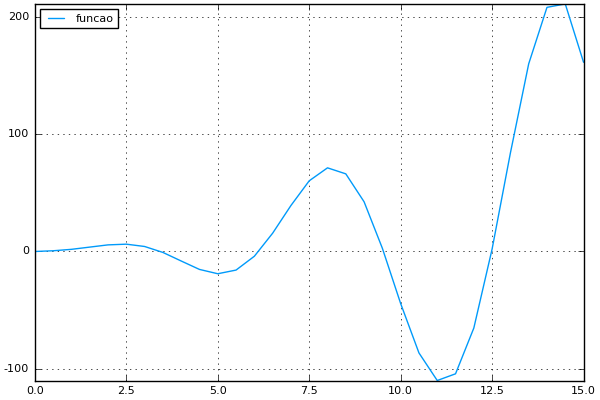

In [96]:
using Plots
pyplot()

plot(fx, 0:0.5:15, label = "funcao")

In [69]:
# Vetor de valores iniciais (xi)
v = [0.0, 2.0, 6.0, 9.0, 13.0]

# Dataframe que vai receber as raízes calculadas de tamanho 5. 
# O tipo dos dados são Array de Float64

Resultado1 = DataFrame(Valor_X = rand(5), Raiz = rand(5));

In [70]:
# laço for adiciona o valor de "x" na primeira coluna 1
# e a raiz na coluna 2

for i = 1:length(v)
    Resultado1[1][i] = v[i]
    Resultado1[2][i] = nsolve(fx, v[i])
end

In [71]:
Resultado1

,Valor_X,Raiz
1,0.0,0.0
2,2.0,0.0
3,6.0,6.119024225042324
4,9.0,9.529904336449029
5,13.0,12.486196308339682


**Outra forma `Like a Python`**

Criar um DataFrame vazio e um laço `for` vai adicionando ao final tal como um vetor.

In [72]:
# = [] siginifica vetor vazio

Resultado2 = DataFrame(Valor_X = [], Raiz = [])

,Valor_X,Raiz


In [73]:
# Vetor de valores iniciais (xi)
# ATENÇÃO! como o Resultado2 é um vetor vazio, a cada execução
# será criada ao final do DataFrame um novo conjunto de dados
# para evitar isso use unique!(Resultado2) ao final do laço
v = [0.0, 2.0, 6.0, 9.0, 13.0]

for i in v
    push!(Resultado2, [i, nsolve(fx, i)])
end

unique!(Resultado2)

,Valor_X,Raiz
1,0.0,0.0
2,2.0,0.0
3,6.0,6.119024225042324
4,9.0,9.529904336449029
5,13.0,12.486196308339682


In [76]:
# Testando os resultados 

for i = 1:length(v)
    print(fx(Resultado2[2][1])," ; ")
end

0.0 ; 0.0 ; 0.0 ; 0.0 ; 0.0 ; 

In [77]:
# Gravando os dados em um arquivo CSV

writetable("Resultado2.csv", Resultado1, separator = ',', header = true)

**Outa forma de adicionar dados ao final de um Dataframe**

Comando vcat. Sintaxe:

```julia
vcat(nome_Dataframe, DataFrame(coluna1 = dados, coluna2 = dados))
```

**Adicionando um único valor de raiz**

In [78]:
Resultado2 = readtable("Resultado2.csv")
push!(Resultado2, [60, nsolve(fx, 60)]) # pode ser usado também o comando vcat
Resultado2

,Valor_X,Raiz
1,0.0,0.0
2,2.0,0.0
3,6.0,6.119024225042324
4,9.0,9.529904336449029
5,13.0,12.486196308339682
6,60.0,59.70700965357191


**Adicionando vários valores de raizes**

In [79]:
# vetor de raízes aproximadas e vetor de raizes calculadas pelo SymPy
novos_valores_x = [62, 70, 75, 80] 
novas_raizes_f = [nsolve(fx, raiz) for raiz = novos_valores_x]

4-element Array{Float64,1}:
  62.8159
  69.1006
  75.385 
 -15.7714

In [80]:
Resultado2 = vcat(Resultado2, DataFrame(Valor_X = novos_valores_x, Raiz = novas_raizes_f))

,Valor_X,Raiz
1,0.0,0.0
2,2.0,0.0
3,6.0,6.119024225042324
4,9.0,9.529904336449029
5,13.0,12.486196308339682
6,60.0,59.70700965357191
7,62.0,62.81593287133609
8,70.0,69.10056621235024
9,75.0,75.38495805125963
10,80.0,-15.771411695083252
